### lotto 데이터 분석

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
resources_path = "resources/"
lotto_numbers_histories_file_path = resources_path + "lotto_numbers_histories.json"

In [3]:
with open(lotto_numbers_histories_file_path) as f:
    lotto_df = pd.DataFrame(json.loads(line) for line in f)

In [4]:
lotto_df.head(10)

,totSellamnt,returnValue,drwNoDate,firstWinamnt,drwtNo6,drwtNo4,firstPrzwnerCo,drwtNo5,bnusNo,firstAccumamnt,drwNo,drwtNo2,drwtNo3,drwtNo1
0,3681782000,success,2002-12-07,0,40,33,0,37,16,863604600,1,23,29,10
1,4904274000,success,2002-12-14,2002006800,42,25,1,32,2,0,2,13,21,9
2,4729342000,success,2002-12-21,2000000000,31,21,1,27,30,0,3,16,19,11
3,5271464000,success,2002-12-28,0,42,31,0,40,2,1267147200,4,27,30,14
4,6277102000,success,2003-01-04,0,42,40,0,41,3,3041094900,5,24,29,16
5,15305356000,success,2003-01-11,6574451700,42,27,1,40,34,0,6,15,26,14
6,12794890000,success,2003-01-18,0,40,25,0,26,42,2600913000,7,9,16,2
7,20751450000,success,2003-01-25,0,39,34,0,37,9,7336896000,8,19,25,8
8,73624020000,success,2003-02-01,0,39,17,0,36,14,25803852000,9,4,16,2
9,260856392000,success,2003-02-08,6430437900,44,33,13,41,6,0,10,25,30,9


In [5]:
lotto_df_type_dict = {
    'drwNo': 'int32',
    'drwNoDate': 'String',
    'returnValue': 'String', 
    'totSellamnt': 'int64', 
    'firstPrzwnerCo': 'int32',
    'firstWinamnt': 'int64',
    'firstAccumamnt': 'int64',
    'drwtNo1': 'int32',
    'drwtNo2': 'int32',
    'drwtNo3': 'int32',
    'drwtNo4': 'int32',
    'drwtNo5': 'int32',
    'drwtNo6': 'int32',
    'bnusNo': 'int32'
}

In [6]:
reindexed_lotto_df = lotto_df[lotto_df_type_dict.keys()]

In [7]:
reindexed_lotto_df.tail(10)

,drwNo,drwNoDate,returnValue,totSellamnt,firstPrzwnerCo,firstWinamnt,firstAccumamnt,drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo
888,889,2019-12-14,success,86734222000,10,2108986950,21089869500,3,13,29,38,39,42,26
889,890,2019-12-21,success,86693498000,9,2335486167,21019375503,1,4,14,18,29,37,6
890,891,2019-12-28,success,89742677000,7,3082673947,21578717629,9,13,28,31,39,41,19
891,892,2020-01-04,success,93091115000,17,1282017464,21794296888,4,9,17,18,26,42,36
892,893,2020-01-11,success,87661567000,9,2377433625,21396902625,1,15,17,23,25,41,10
893,894,2020-01-18,success,88465183000,9,2377935959,21401423631,19,32,37,40,41,43,45
894,895,2020-01-25,success,96962255000,12,1928079219,23136950628,16,26,31,38,39,41,23
895,896,2020-02-01,success,90461998000,7,3053222036,21372554252,5,12,25,26,38,45,23
896,897,2020-02-08,success,88231474000,13,1619922520,21058992760,6,7,12,22,26,36,29
897,898,2020-02-15,success,90067839000,8,2639313235,21114505880,18,21,28,35,37,42,17


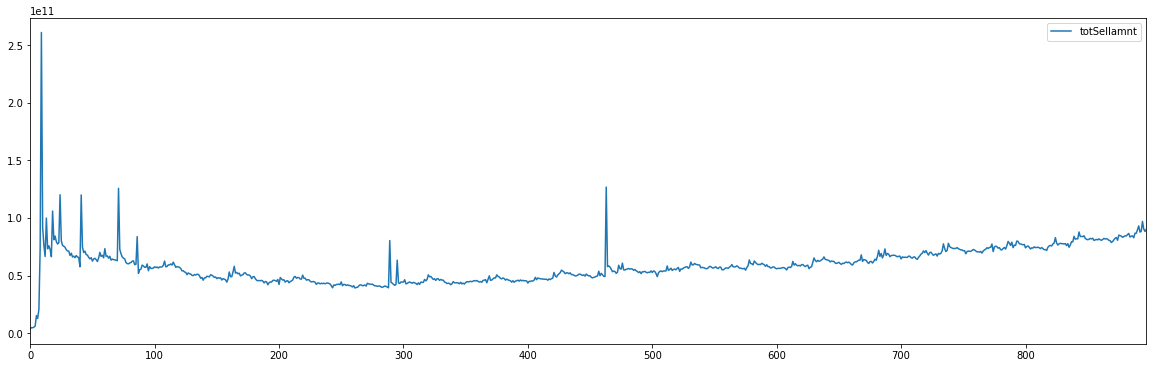

In [8]:
# 로또 총 판매금
reindexed_lotto_df['totSellamnt'].plot(figsize=(20,6)) 
plt.legend()
plt.show()

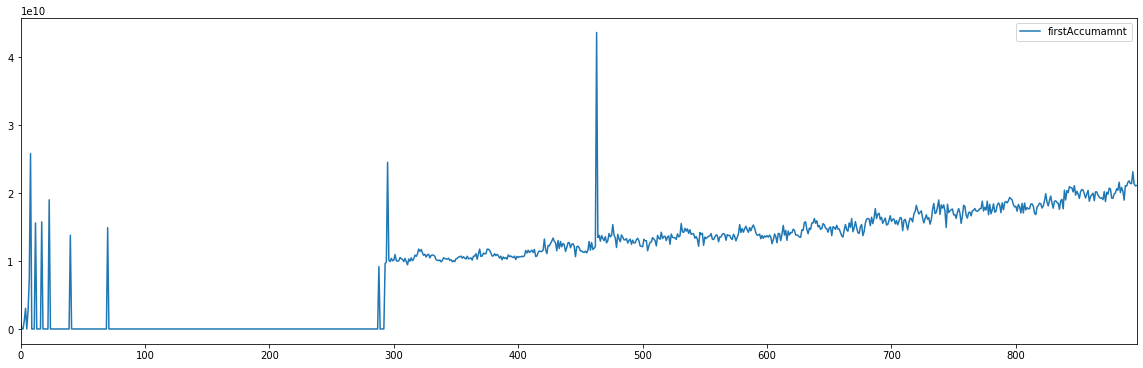

In [9]:
# 1등 당첨금 총액
reindexed_lotto_df['firstAccumamnt'].plot(figsize=(20,6)) 
plt.legend()
plt.show()

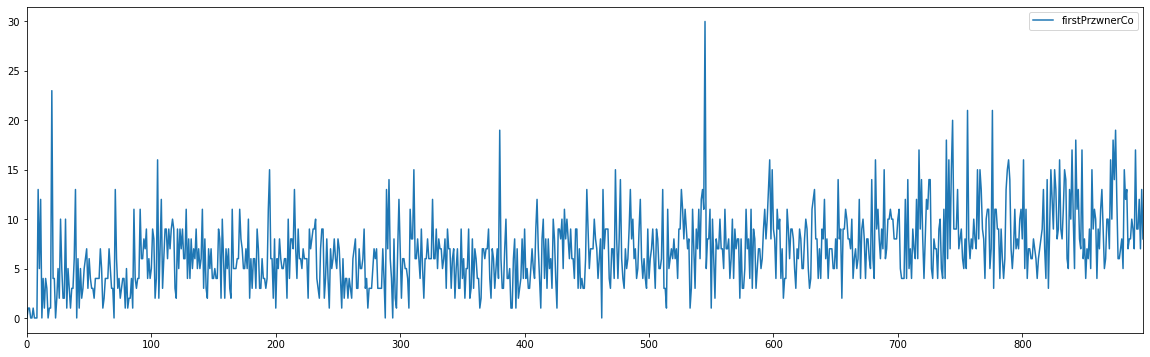

In [10]:
# 1등 당첨자 수
reindexed_lotto_df['firstPrzwnerCo'].plot(figsize=(20,6)) 
plt.legend()
plt.show()

In [11]:
lotto_numbers_stats = reindexed_lotto_df[['drwtNo1', 'drwtNo2', 'drwtNo3', 'drwtNo4', 'drwtNo5', 'drwtNo6', 'bnusNo']]

In [12]:
lotto_numbers_stats

,drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
893,19,32,37,40,41,43,45
894,16,26,31,38,39,41,23
895,5,12,25,26,38,45,23
896,6,7,12,22,26,36,29


In [13]:
all_numbers = pd.Series(data = np.arange(1, 46), name = "No").to_frame()
drwt_no1 = pd.Series(data = lotto_numbers_stats['drwtNo1'].value_counts(), name = 'drwtNo1').to_frame()
drwt_no2 = pd.Series(data = lotto_numbers_stats['drwtNo2'].value_counts(), name = 'drwtNo2').to_frame()
drwt_no3 = pd.Series(data = lotto_numbers_stats['drwtNo3'].value_counts(), name = 'drwtNo3').to_frame()
drwt_no4 = pd.Series(data = lotto_numbers_stats['drwtNo4'].value_counts(), name = 'drwtNo4').to_frame()
drwt_no5 = pd.Series(data = lotto_numbers_stats['drwtNo5'].value_counts(), name = 'drwtNo5').to_frame()
drwt_no6 = pd.Series(data = lotto_numbers_stats['drwtNo6'].value_counts(), name = 'drwtNo6').to_frame()
bnus_no = pd.Series(data = lotto_numbers_stats['bnusNo'].value_counts(), name = 'bnusNo').to_frame()

In [14]:
number_stats = pd.merge(all_numbers, drwt_no1, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, drwt_no2, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, drwt_no3, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, drwt_no4, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, drwt_no5, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, drwt_no6, left_on = 'No', right_index = True, how = "left")
number_stats = pd.merge(number_stats, bnus_no, left_on = 'No', right_index = True, how = "left")
number_stats = number_stats.fillna(0)

In [15]:
number_stats['count_sum'] = number_stats['drwtNo1'] + number_stats['drwtNo2'] + number_stats['drwtNo3'] + number_stats['drwtNo4'] + number_stats['drwtNo5'] + number_stats['drwtNo6']

In [16]:
number_stats['rate'] = number_stats['count_sum']/lotto_numbers_stats['drwtNo1'].count() * 100

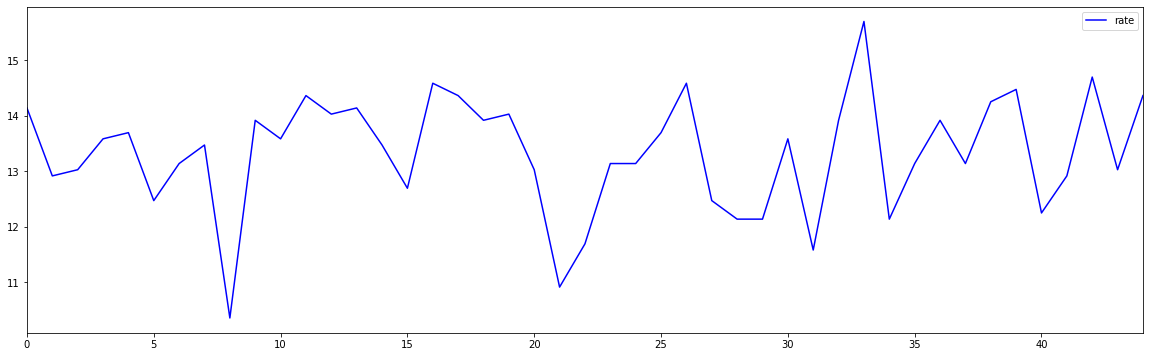

In [17]:
number_stats['rate'].plot(figsize=(20,6),color = 'blue') 
plt.legend() 
plt.show()

In [20]:
number_stats.sort_values(by='count_sum', ascending=False)

,No,drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo,count_sum,rate
33,34,0.0,3.0,9.0,39.0,60.0,30.0,15,141.0,15.701559
42,43,0.0,0.0,0.0,2.0,26.0,104.0,32,132.0,14.699332
26,27,0.0,13.0,32.0,45.0,32.0,9.0,24,131.0,14.587973
16,17,15.0,41.0,42.0,26.0,7.0,0.0,24,131.0,14.587973
39,40,0.0,0.0,1.0,12.0,45.0,72.0,15,130.0,14.476615
44,45,0.0,0.0,0.0,0.0,0.0,129.0,14,129.0,14.365256
11,12,31.0,53.0,30.0,13.0,2.0,0.0,22,129.0,14.365256
17,18,7.0,38.0,50.0,26.0,8.0,0.0,14,129.0,14.365256
38,39,0.0,0.0,2.0,12.0,59.0,55.0,19,128.0,14.253898
13,14,26.0,42.0,40.0,18.0,1.0,0.0,16,127.0,14.142539
